In [9]:
#1
import os
import pandas as pd
from PIL import Image
import glob
import io
import base64
from io import BytesIO
from IPython.core.display import HTML

#2
import os
import random
from PIL import Image, ImageFilter
import numpy as np

<img src='ex/1.1.png' width=600, heigth=540>

<img src='ex/1.2.png' width=600, heigth=540>

Файл C:\Users\kklin\pythonDataProc\lab4\data\random_15\11.svg не є зображенням: cannot identify image file 'C:\\Users\\kklin\\pythonDataProc\\lab4\\data\\random_15\\11.svg'



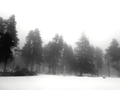
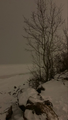
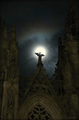
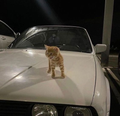
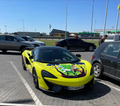
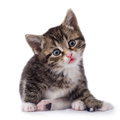
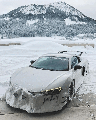
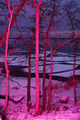
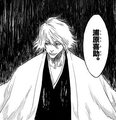
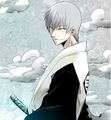
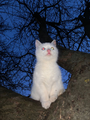
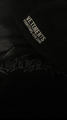
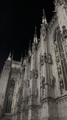
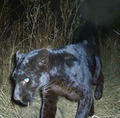
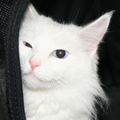

In [7]:
def get_thumbnail(path):
    img = Image.open(path)
    img.thumbnail((120, 120), Image.LANCZOS)
    return img

def image_base64(img):
    buffer = io.BytesIO()
    img.save(buffer, format="PNG")
    return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

def process_images(folder_path):
    image_files = glob.glob(os.path.join(folder_path, '*.*'))
    
    data = []
    
    for file in image_files:
        try:
            img = Image.open(file)
            width, height = img.size
            mode = img.mode
            format = img.format
            channels = len(img.getbands())
            size_mb = round(os.path.getsize(file) / (1024 * 1024), 2)
            
            data.append({
                'Filename': os.path.basename(file),
                'Color Model': mode,
                'Format': format,
                'Channels': channels,
                'Size (MB)': size_mb,
                'Width': width,
                'Height': height,
                'Full Path': file,
                'Thumbnail': get_thumbnail(file)
            })
        except Exception as e:
            print(f"Файл {file} не є зображенням: {e}")
            continue
    
    df = pd.DataFrame(data)
    
    pd.set_option('display.max_colwidth', None)
    return df

folder_path = 'C:\\Users\\kklin\\pythonDataProc\\lab4\\data\\random_15'
df_images = process_images(folder_path)

HTML(df_images.to_html(formatters={'Thumbnail': image_formatter}, escape=False))

<img src='ex/2.1.png' width=600, heigth=540>

<img src='ex/2.2.png' width=600, heigth=540>

Постер збережено як .\data\poster.jpg


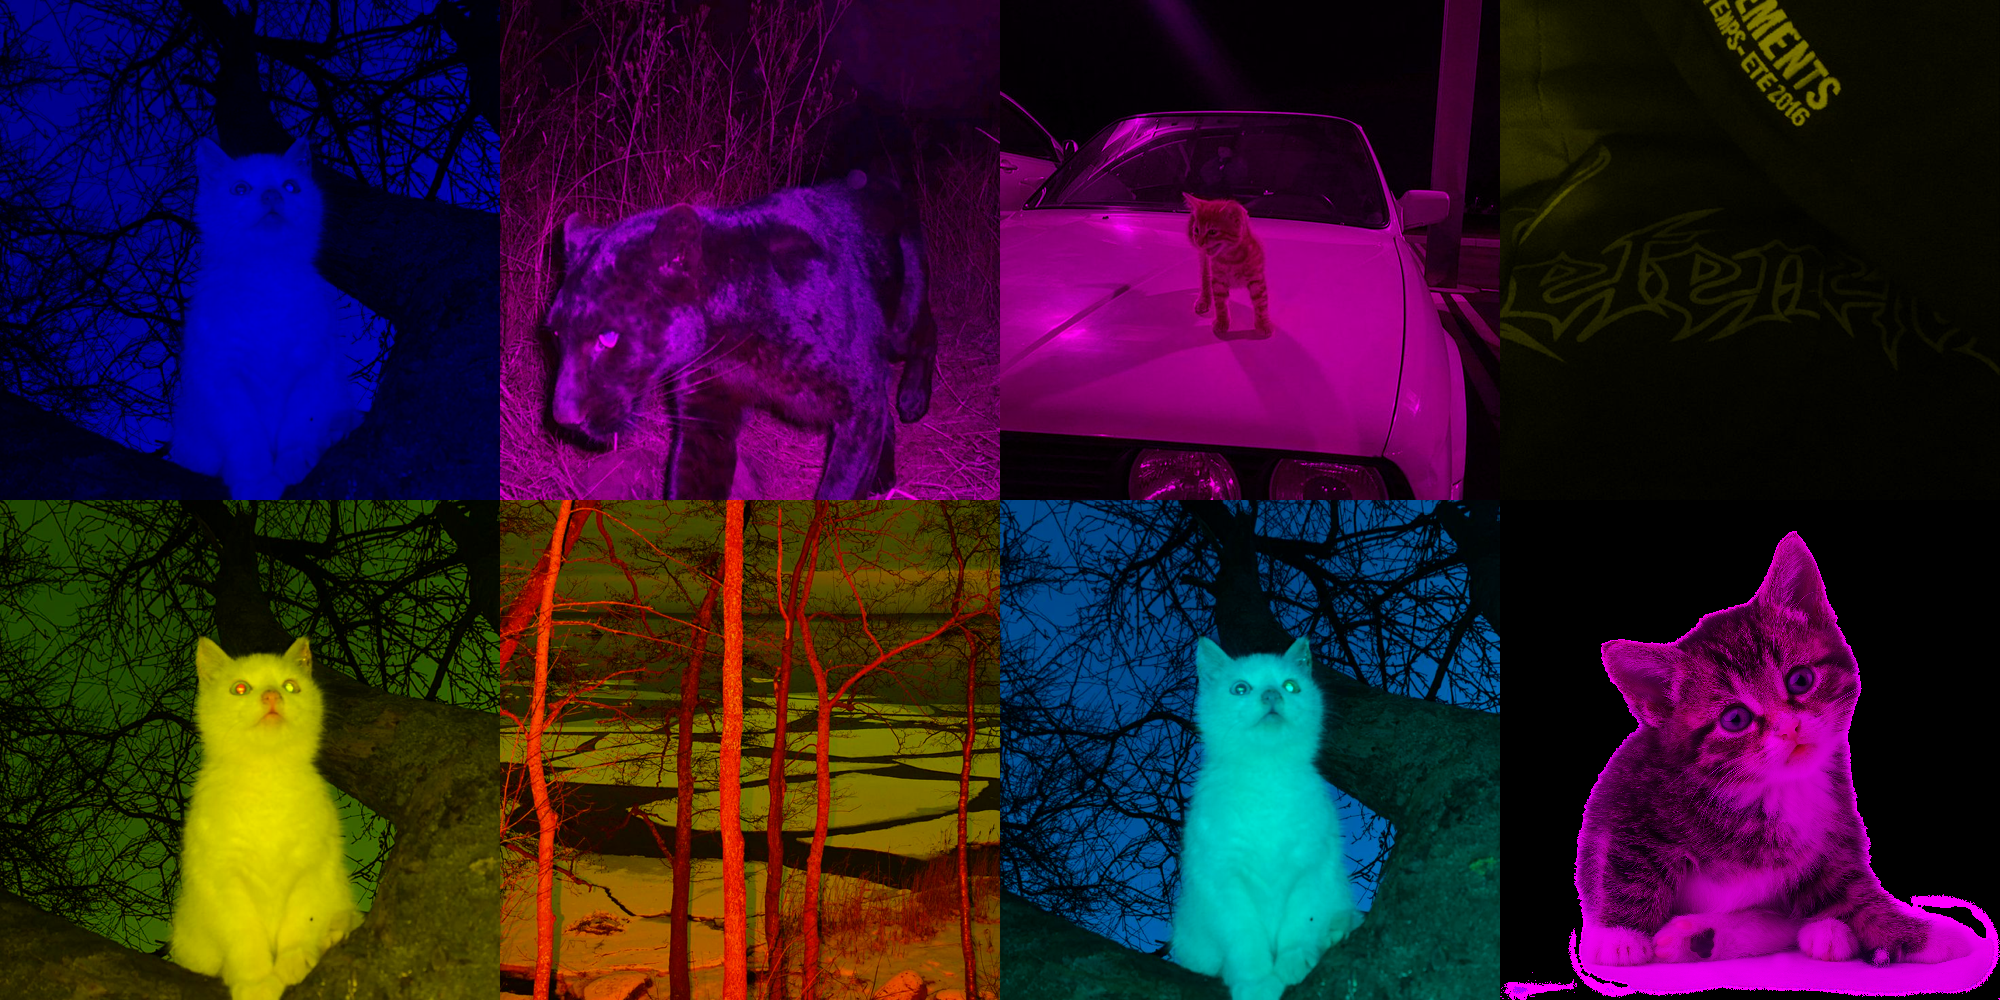

In [107]:

def crop_to_square(image):
    width, height = image.size
    min_dim = min(width, height)
    
    left = (width - min_dim) // 2
    top = (height - min_dim) // 2
    right = left + min_dim
    bottom = top + min_dim
    
    return image.crop((left, top, right, bottom))

def apply_color_filter(image):
    filters = ['red', 'green', 'blue', 'yellow', 'purple', 'cyan']
    filter_choice = random.choice(filters)
    
    img_array = np.array(image)

    if filter_choice == 'red':
        img_array[:, :, 1:] = 0 
    elif filter_choice == 'green':
        img_array[:, :, [0, 2]] = 0
    elif filter_choice == 'blue':
        img_array[:, :, :2] = 0 
    elif filter_choice == 'yellow':
        img_array[:, :, 2] = 0
    elif filter_choice == 'purple':
        img_array[:, :, 1] = 0
    elif filter_choice == 'cyan':
        img_array[:, :, 0] = 0

    return Image.fromarray(img_array)

def to_poster(folder_path, output_name, cols, rows):
    images = [f for f in os.listdir(folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]
    
    processed_images = []

    for _ in range(cols * rows):
        img_path = os.path.join(folder_path, random.choice(images))
        img = Image.open(img_path)
        img = crop_to_square(img)
        img = img.resize((500, 500))
        img = apply_color_filter(img)
        processed_images.append(img)

    poster_width = cols * 500
    poster_height = rows * 500
    poster = Image.new('RGB', (poster_width, poster_height))

    for i in range(rows):
        for j in range(cols):
            img = processed_images[i * cols + j]
            poster.paste(img, (j * 500, i * 500))

    poster.save(output_name)
    print(f"Постер збережено як {output_name}")
    return poster

folder_path = 'C:\\Users\\kklin\\pythonDataProc\\lab4\\data\\random_15'
output_name = '.\\data\\poster.jpg'
cols = 4
rows = 2

img = to_poster(folder_path, output_name, cols, rows)
img